# EDSA: Sendy Logistics Challenge by EXPLORE Data Science Academy

## Introduction

### Sendy, in partnership with insight2impact facility, is hosting a Zindi challenge to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination.

- The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

- Sendy helps men and women behind every type of business to trade easily, deliver more competitively, and build extraordinary businesses.

- Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa.

- The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions, to providing dedicated support for goods on the move.

- Currently operating in Kenya and Uganda, Sendy is expanding to Nigeria and Tanzania, to enable thousands more businesses to move volumes of goods easily, anywhere, at any time. Sendy aggregates a pool of delivery options from 28 ton, 14 ton, 5 ton trucks to pick up trucks, vans and motorcycles.

## Objectives

- Build regression model predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination
- The error metric for this competition is the Root Mean Squared Error

### Contents

- Import Libraries
- Import Data
- Understand the Data
- Preprocessing
- Feature Engineering
- One Hot Encoding
- Modelling
- Model Analysis
- Final Prediction 

## 1. Import Libraries

In [1]:
import pandas as pd # Data Frame manipulation
import numpy as np # Array manipulation
import datetime as dt # Date Time columns manipulation
import string 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor # Model of choice
from sklearn.model_selection import train_test_split # Train my model on a validation set first
from sklearn.metrics import mean_squared_error # Metric of evaluation for project

## 2. Import the data

In [4]:
df_test = pd.read_csv("Test.csv") # Final set to test model and submit on

df_train = pd.read_csv("Train.csv") # Data to train model on
df_train.drop_duplicates(inplace=True) # Remove Duplicate Rows

df_riders = pd.read_csv("Riders.csv") # Rider Metrics
df_riders.drop_duplicates(inplace=True) # Remove Duplicate Rows

df_sample_submission = pd.read_csv("SampleSubmission.csv") # Final submission sample

FileNotFoundError: [Errno 2] File b'Test.csv' does not exist: b'Test.csv'

# <font color=green>3. Understanding the Data</font>
- Columns
- Indexes

#### Data Preview

In [992]:
df_train.head(3) # View the data setup

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


#### Unique Counts (Identify column types and distinguish continuous and discrete variables)

In [993]:
df_train.nunique()

Order No                                     21201
User Id                                       3186
Vehicle Type                                     1
Platform Type                                    4
Personal or Business                             2
Placement - Day of Month                        31
Placement - Weekday (Mo = 1)                     7
Placement - Time                             15686
Confirmation - Day of Month                     31
Confirmation - Weekday (Mo = 1)                  7
Confirmation - Time                          15742
Arrival at Pickup - Day of Month                31
Arrival at Pickup - Weekday (Mo = 1)             7
Arrival at Pickup - Time                     15767
Pickup - Day of Month                           31
Pickup - Weekday (Mo = 1)                        7
Pickup - Time                                15690
Arrival at Destination - Day of Month           31
Arrival at Destination - Weekday (Mo = 1)        7
Arrival at Destination - Time  

#### Drop Vehicle Type Since Only One Unique Type

In [3]:
df_train.drop("Vehicle Type", axis=1, inplace=True)
df_test.drop("Vehicle Type", axis=1, inplace=True)

NameError: name 'df_train' is not defined

#### Describe Data

In [995]:
df_train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


#### Categorical Columns
- Vehicle Type
- Platform Type
- Personal or Business

#### Time Columns (Columns containing)
- Day of Month
- Weekday (Mo = 1)
- Time

# <font color=green>4. Data Preprocessing</font>
- Missing Data
- Categorical Data

#### Function to Change Column names to be without spaces and special characters

In [996]:
def col_rename(cols): #Takes a list of columns
    
    """Remove blank spaces and special characters in column names"""
    
    new_col_names = []
    special_chars = (string.punctuation).replace("_", " ") # String containing all special characters and blank space
    for col in cols:
        for char in special_chars:
            if char in col:
                col = col.replace(char,"_") # Replace special characters with underscore
        new_col_names.append(col)
   
    return new_col_names

In [997]:
df_train.columns = col_rename(df_train.columns) # Call function to remove spaces
df_test.columns = col_rename(df_test.columns)
df_train.head(2)

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement___Day_of_Month,Placement___Weekday__Mo___1_,Placement___Time,Confirmation___Day_of_Month,Confirmation___Weekday__Mo___1_,Confirmation___Time,...,Arrival_at_Destination___Time,Distance__KM_,Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


### Missing Data

In [999]:
df_train.info() # Check for missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 28 columns):
Order_No                                     21201 non-null object
User_Id                                      21201 non-null object
Platform_Type                                21201 non-null int64
Personal_or_Business                         21201 non-null object
Placement___Day_of_Month                     21201 non-null int64
Placement___Weekday__Mo___1_                 21201 non-null int64
Placement___Time                             21201 non-null object
Confirmation___Day_of_Month                  21201 non-null int64
Confirmation___Weekday__Mo___1_              21201 non-null int64
Confirmation___Time                          21201 non-null object
Arrival_at_Pickup___Day_of_Month             21201 non-null int64
Arrival_at_Pickup___Weekday__Mo___1_         21201 non-null int64
Arrival_at_Pickup___Time                     21201 non-null object
Pickup___Day_of_Month      

#### Replace Missing data with median for continuous variables

In [1000]:
# Take Average Temperature for Missing Values
temp_median = round(df_train["Temperature"].median(), 1) # Use same median so that data processed the same



df_train["Temperature"] = df_train["Temperature"].apply(lambda x: temp_median if pd.isnull(x) else x)
df_test["Temperature"] = df_test["Temperature"].apply(lambda x: temp_median if pd.isnull(x) else x)


# Assume it was not raining for missing values
df_train["Precipitation_in_millimeters"]=df_train["Precipitation_in_millimeters"].apply(lambda x: 0 if pd.isnull(x) else x)
df_test["Precipitation_in_millimeters"]=df_test["Precipitation_in_millimeters"].apply(lambda x: 0 if pd.isnull(x) else x)

###  Time and Date Columns

#### Check Whether Placement, Confirmation, Pick Up and Delivery happen at the same day
- If same day then all other day and month day columns redundant

##### TRAIN DATA

In [1004]:
PlacementAndConfirmWeekDay = (df_train["Placement___Weekday__Mo___1_"]).equals(df_train["Confirmation___Weekday__Mo___1_"])
PlacementAndConfirmMonth = (df_train["Placement___Day_of_Month"]).equals(df_train["Confirmation___Day_of_Month"])
if PlacementAndConfirmWeekDay and PlacementAndConfirmMonth:
    print("Placement and confirmation done same day")
    
ArrivePickUpAndConfirmMonth = (df_train["Arrival_at_Pickup___Day_of_Month"]).equals(df_train["Confirmation___Day_of_Month"])
ArrivePickUpAndConfirmDay = (df_train["Arrival_at_Pickup___Weekday__Mo___1_"]).equals(df_train["Confirmation___Weekday__Mo___1_"])
if ArrivePickUpAndConfirmMonth and ArrivePickUpAndConfirmDay:
    print("Confirmation and Arrival at PickUp done same day")
    
ArriveAndPickUpMonth = (df_train["Pickup___Day_of_Month"]).equals(df_train["Arrival_at_Pickup___Day_of_Month"])
ArriveAndPickUpDay = (df_train["Pickup___Weekday__Mo___1_"]).equals(df_train["Arrival_at_Pickup___Weekday__Mo___1_"])
if ArriveAndPickUpMonth and ArriveAndPickUpDay:
    print("Arrival and Pick-Up done same day")
    
ArriveDestAndPickUpMonth = (df_train["Arrival_at_Destination___Day_of_Month"]).equals(df_train["Arrival_at_Pickup___Day_of_Month"])
ArriveDestAndPickUpDay = (df_train["Arrival_at_Destination___Weekday__Mo___1_"]).equals(df_train["Arrival_at_Pickup___Weekday__Mo___1_"])
if ArriveDestAndPickUpMonth and ArriveDestAndPickUpDay:
    print("Pick up and Delivery done same Day")

Placement and confirmation done same day
Confirmation and Arrival at PickUp done same day
Arrival and Pick-Up done same day
Pick up and Delivery done same Day


##### TEST DATA

In [1002]:
PlacementAndConfirmWeekDay = (df_test["Placement___Weekday__Mo___1_"]).equals(df_test["Confirmation___Weekday__Mo___1_"])
PlacementAndConfirmMonth = (df_test["Placement___Day_of_Month"]).equals(df_test["Confirmation___Day_of_Month"])
if PlacementAndConfirmWeekDay and PlacementAndConfirmMonth:
    print("Placement and confirmation done same day")
    
ArrivePickUpAndConfirmMonth = (df_test["Arrival_at_Pickup___Day_of_Month"]).equals(df_test["Confirmation___Day_of_Month"])
ArrivePickUpAndConfirmDay = (df_test["Arrival_at_Pickup___Weekday__Mo___1_"]).equals(df_test["Confirmation___Weekday__Mo___1_"])
if ArrivePickUpAndConfirmMonth and ArrivePickUpAndConfirmDay:
    print("Confirmation and Arrival at PickUp done same day")
    
ArriveAndPickUpMonth = (df_test["Pickup___Day_of_Month"]).equals(df_test["Arrival_at_Pickup___Day_of_Month"])
ArriveAndPickUpDay = (df_test["Pickup___Weekday__Mo___1_"]).equals(df_test["Arrival_at_Pickup___Weekday__Mo___1_"])
if ArriveAndPickUpMonth and ArriveAndPickUpDay:
    print("Arrival and Pick-Up done same day")
    

Placement and confirmation done same day
Confirmation and Arrival at PickUp done same day
Arrival and Pick-Up done same day


##### Remove columns with different days - TRAIN DATA

In [1003]:
f = df_train["Placement___Weekday__Mo___1_"] == df_train["Confirmation___Weekday__Mo___1_"]
diff_day = []
for t in range(len(f)):
    if f.iloc[t] == False:
        diff_day.append(t)
df_train.drop(diff_day, inplace=True)
print("Rows with different days:",len(diff_day))

Rows with different days: 2


#### Have one column for Day of Month and Day of Week respectively

In [1005]:
df_train['Day_of_Month'] = df_train['Placement___Day_of_Month'] # Could have used any columns
df_train['Weekday'] = df_train['Placement___Weekday__Mo___1_'] 
df_test['Day_of_Month'] = df_test['Placement___Day_of_Month']
df_test['Weekday'] = df_test['Placement___Weekday__Mo___1_']

### Time Columns Manipulation - Set Times 
- Time it takes from placement to confirm
- Time it takes from confrim to Pick Up by driver
- Time it takes from arriving at pick up to leaving by driver

In [1008]:
def set_times(df): # Takes a Data Frame and adds time interval columns
    
    """Calculate time intervals"""
    
    placement_time = pd.to_datetime(df["Placement___Time"])
    confirm_time = pd.to_datetime(df["Confirmation___Time"])
    arrival_atpickup_time = pd.to_datetime(df["Arrival_at_Pickup___Time"])
    pickup_time = pd.to_datetime(df["Pickup___Time"])

    df["Time_Placement_To_Confirm"] = (confirm_time - placement_time).dt.seconds
    df["Time_Confirm_To_PickUp_Arrival"] = (arrival_atpickup_time - confirm_time).dt.seconds
    df["Time_PickUp_Arrival_To_PickUp"] = (pickup_time - arrival_atpickup_time).dt.seconds

In [1009]:
set_times(df_train)
set_times(df_test)

### Riders DATA - Information about Riders

In [1010]:
df_riders.head(4)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75


In [1011]:
df_riders.columns = [col.replace(" ","_") for col in df_riders.columns] # Remove spaces in column names

In [1012]:
df_riders.nunique()

Rider_Id          960
No_Of_Orders      811
Age               725
Average_Rating     45
No_of_Ratings     553
dtype: int64

### Join Riders DF

In [1013]:
df_train = pd.merge(df_train, df_riders, on='Rider_Id')
df_test = pd.merge(df_test, df_riders, on='Rider_Id')

# <font color=green>5. Feature Engineering</font>

### Placement Time

In [1015]:
def placement_time(df): # Takes a dataframe 
    
    """Set the placement time off day for the order"""
    
    time_of_day = [] # List to convert to column with the time of day
    
    for t in pd.to_datetime(df.Placement___Time).dt.hour:
        if t >= 6 and t < 10:
            time_of_day.append("Early_Morning")  # "Early_Morning"
        elif t >= 10 and t < 12:
            time_of_day.append("Late_Morning")  # "Late_Morning"
        elif t >= 12 and t < 15:
            time_of_day.append("Early_Afternoon")  # "Early_Afternoon"
        elif t >= 15 and t < 18:
            time_of_day.append("Late_Afternoon")  # "Late_Afternoon"
        else:
            time_of_day.append("Night")  # "Night"
            
    return time_of_day 

In [1016]:
df_train["Placement_Time_Of_Day"] = placement_time(df_train)
df_test["Placement_Time_Of_Day"] = placement_time(df_test)

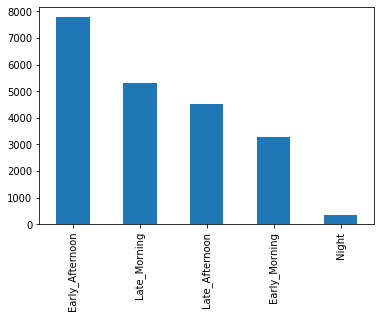

In [1020]:
df_train.Placement_Time_Of_Day.value_counts().plot(kind="bar")

### Orders per day of Month

In [1021]:
def orders_day_month(df):
    
    """Checks how many orders on that specific day of month and categorizes"""
    
    orders = []
    ord_m = df.groupby(['Day_of_Month'])['Order_No'].transform('count') # Total orders on each day
    q1 = np.quantile(ord_m, 0.25)
    q2 = np.quantile(ord_m, 0.5)
    q3 = np.quantile(ord_m, 0.75)    
    
    for o in ord_m: #Group If there was much or little
        if o < q1:
            orders.append("Q1")        
        elif o >= q1 and o < q2:
            orders.append("Q2")
        elif o >= q2 and o < q3:
            orders.append("Q3")
        else:
            orders.append("Q4")
            
    return orders

In [1022]:
df_train["Orders_On_Day"] = orders_day_month(df_train)
df_test["Orders_On_Day"] = orders_day_month(df_test)

### Average distance for User_Id

In [1023]:
def average_user_distance(df):
    
    
    """Average distance for that specific user"""
    
    ave_dist = []
    ave_user_dist = df.groupby(['User_Id'])['Distance__KM_'].transform('mean') #average distance for each user
    q1 = np.quantile(ave_user_dist, 0.25)
    q2 = np.quantile(ave_user_dist, 0.5)
    q3 = np.quantile(ave_user_dist, 0.75)    
    
    for d in ave_user_dist: #Group Distances into Q1, Q2, Q3, Q4
        if d < q1:
            ave_dist.append("Q1")        
        elif d >= q1 and d < q2:
            ave_dist.append("Q2")
        elif d >= q2 and d < q3:
            ave_dist.append("Q3")
        else:
            ave_dist.append("Q4")
            
    return ave_dist

In [1024]:
df_train["Average_User_Dist"] = average_user_distance(df_train)
df_test["Average_User_Dist"] = average_user_distance(df_test)

### Average distance for Rider_Id

In [1025]:
def average_rider_distance(df):
    
    """Average distance for that specific rider"""
    
    ave_dist = []
    ave_user_dist = df.groupby(['Rider_Id'])['Distance__KM_'].transform('mean') #average distance for each user
    q1 = np.quantile(ave_user_dist, 0.25)
    q2 = np.quantile(ave_user_dist, 0.5)
    q3 = np.quantile(ave_user_dist, 0.75)    
    
    for d in ave_user_dist: #Group Distances into Q1, Q2, Q3, Q4
        if d < q1:
            ave_dist.append("Q1")        
        elif d >= q1 and d < q2:
            ave_dist.append("Q2")
        elif d >= q2 and d < q3:
            ave_dist.append("Q3")
        else:
            ave_dist.append("Q4")
            
    return ave_dist

In [1026]:
df_train["Average_Rider_Dist"] = average_rider_distance(df_train)
df_test["Average_Rider_Dist"] = average_rider_distance(df_test)

### Distance Bracket

In [1027]:
dist_mean = df_train.Distance__KM_.mean()
def dist_bracket(df):
    
    """Checks which category the distance falls under"""
    
    ave_dist = []
    q1 = np.quantile(df_train.Distance__KM_, 0.25)
    q2 = np.quantile(df_train.Distance__KM_, 0.5)
    q3 = np.quantile(df_train.Distance__KM_, 0.75)    
    
    for d in df.Distance__KM_: 
        if d < q1:
            ave_dist.append("Q1")        
        elif d >= q1 and d < q2:
            ave_dist.append("Q2")
        elif d >= q2 and d < q3:
            ave_dist.append("Q3")
        else:
            ave_dist.append("Q4")
            
    return ave_dist

In [1028]:
df_train["Distance_Bracket"] = dist_bracket(df_train)
df_test["Distance_Bracket"] = dist_bracket(df_test)

### DROP Redundant and Transformed Columns

In [1029]:
placement_drop = ['Placement___Day_of_Month', 'Placement___Weekday__Mo___1_', 'Placement___Time']
confirmation_drop = ['Confirmation___Day_of_Month', 'Confirmation___Weekday__Mo___1_', 'Confirmation___Time']
arrival_at_pickup_drop = ['Arrival_at_Pickup___Day_of_Month', 'Arrival_at_Pickup___Weekday__Mo___1_', 'Arrival_at_Pickup___Time']
pickup_drop = ['Pickup___Day_of_Month', 'Pickup___Weekday__Mo___1_', 'Pickup___Time']
arrival_dest_drop = ['Arrival_at_Destination___Day_of_Month', 'Arrival_at_Destination___Weekday__Mo___1_', 'Arrival_at_Destination___Time']

In [1030]:
df_train.drop('User_Id', axis=1,inplace=True)
df_test.drop('User_Id', axis=1,inplace=True)

In [1031]:
df_train.drop('Rider_Id', axis=1,inplace=True)
df_test.drop('Rider_Id', axis=1,inplace=True)

#### TRAIN DATA

In [1032]:
df_train.drop(placement_drop, axis=1, inplace=True)
df_train.drop(confirmation_drop, axis=1, inplace=True)
df_train.drop(arrival_at_pickup_drop, axis=1, inplace=True)
df_train.drop(pickup_drop, axis=1, inplace=True)
df_train.drop(arrival_dest_drop, axis=1, inplace=True)

#### TEST DATA

In [1033]:
df_test.drop(placement_drop, axis=1, inplace=True)
df_test.drop(confirmation_drop, axis=1, inplace=True)
df_test.drop(arrival_at_pickup_drop, axis=1, inplace=True)
df_test.drop(pickup_drop, axis=1, inplace=True)

### Set Indices

In [1034]:
df_train.set_index("Order_No", inplace=True)
df_test.set_index("Order_No", inplace=True)
df_train.head()

,Platform_Type,Personal_or_Business,Distance__KM_,Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,...,Time_PickUp_Arrival_To_PickUp,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement_Time_Of_Day,Orders_On_Day,Average_User_Dist,Average_Rider_Dist,Distance_Bracket
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,3,Business,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,745,...,1363,1637,1309,13.8,549,Early_Morning,Q2,Q1,Q3,Q1
Order_No_27440,3,Personal,20,24.5,0.0,-1.326774,36.787807,-1.356237,36.904295,2886,...,381,1637,1309,13.8,549,Late_Afternoon,Q4,Q4,Q3,Q4
Order_No_14170,3,Business,6,24.7,0.0,-1.255189,36.782203,-1.273412,36.818206,2615,...,786,1637,1309,13.8,549,Early_Afternoon,Q1,Q2,Q3,Q2
Order_No_21727,3,Personal,18,15.2,0.0,-1.290315,36.757377,-1.223520,36.802061,2986,...,202,1637,1309,13.8,549,Early_Morning,Q1,Q4,Q3,Q4
Order_No_8301,2,Personal,7,19.2,0.0,-1.273524,36.799220,-1.300431,36.752427,1602,...,220,1637,1309,13.8,549,Late_Morning,Q2,Q1,Q3,Q2


# <font color=green>6. One Hot Encoding</font>

In [1035]:
# Rename WeekDay into Days

import calendar

weekdays = list(calendar.day_abbr)

df_train.Weekday = df_train.Weekday.apply(lambda x: weekdays[x-1])
df_test.Weekday = df_test.Weekday.apply(lambda x: weekdays[x-1])

In [1036]:
# Set platform to object
df_train.Platform_Type = df_train.Platform_Type.astype('object')
df_test.Platform_Type = df_test.Platform_Type.astype('object')

In [1037]:
def encode_cols(df):
    
    
    """Encodes Categorical Columns"""
    
    df = df.copy()
    encode_cols = []
    for c in df.columns:
        if df[c].dtype == 'O':
            encode_cols.append(c)
    return pd.get_dummies(df,columns=encode_cols)

### <font color=orange>Model testing DataFrames</font>

In [1038]:
m_df_train = encode_cols(df_train) # Use diffferent reference so that when change data, processed dfs don't change
m_df_test = encode_cols(df_test)


def reset_dfs():
    
    """Resets the dataframes to the preprocessed mode"""
    
    global m_df_train
    m_df_train = encode_cols(df_train)
    global m_df_test
    m_df_test = encode_cols(df_test)

### <font color=purple>X and y split</font>

In [981]:
X = m_df_train.drop(["Time_from_Pickup_to_Arrival"], axis=1)
y = m_df_train.Time_from_Pickup_to_Arrival
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

# <font color=green>7. Fit & Test RandomForestRegressor Model - Function</font>

In [1074]:
RF = RandomForestRegressor(n_estimators=200, max_features='log2', max_depth=10, min_samples_leaf=4)
RF.fit(x_train,y_train)
def model_evaluation(df):
    
    """Fits random regressor model and returns RMSE and R squared for train and test data"""
    
    # X and y split
    global X    
    X = df.drop(["Time_from_Pickup_to_Arrival"], axis=1)
    global y
    y = df.Time_from_Pickup_to_Arrival
    global x_train, x_test, y_train,y_test
    x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)
    
    # Fit Model
    global RF
    RF = RandomForestRegressor(n_estimators=1800, max_features='sqrt', min_samples_leaf=2, max_depth=60, min_samples_split=5)
    RF.fit(x_train,y_train)

    # Get predictions
    y_pred = RF.predict(x_test)
    y_test_pred = RF.predict(x_train)

    # Test Model Performance (Compute RMSE and R Squared)
    RMSE_train = np.sqrt(mean_squared_error(y_train,y_test_pred))
    RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred))
    R_train = round(RF.score(x_train, y_train),2)
    R_test = round(RF.score(x_test, y_test),2)

    print("RMSE_train:",RMSE_train,"\nRMSE_test:",RMSE_test,"\nTrain R^2:",R_train,"\nTest  R^2:",R_test)

### <font color=red>Get Model Results (Perfrmance Evaluation)</font>

In [1048]:
reset_dfs()
model_evaluation(m_df_train)

RMSE_train: 572.3965749599882 
RMSE_test: 732.036407279481 
Train R^2: 0.67 
Test  R^2: 0.42


# <font color=green>8. Model Analysis and Accuracy Improvement</font>

### <font color=orange>Random Hyperparameter Grid</font>

In [1068]:
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### <font color=orange>Feauture Selection</font>

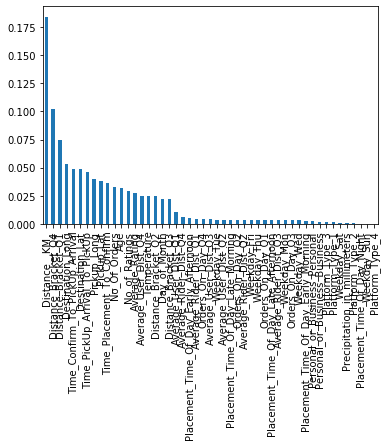

In [1041]:
# Feature Importance

feat_importances = pd.Series(RF.feature_importances_, index=x_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='bar')

In [1043]:
feat_importances.apply(lambda x: x*100) # Rank most predictive features

Distance__KM_                            18.426472
Distance_Bracket_Q4                      10.211096
Distance_Bracket_Q1                       7.466696
Destination_Long                          5.320959
Time_Confirm_To_PickUp_Arrival            4.887650
Destination_Lat                           4.832938
Time_PickUp_Arrival_To_PickUp             4.605445
Pickup_Long                               4.004924
Pickup_Lat                                3.794663
Time_Placement_To_Confirm                 3.595868
No_Of_Orders                              3.269281
Age                                       3.165330
No_of_Ratings                             2.874868
Average_Rating                            2.713740
Average_User_Dist_Q4                      2.505133
Temperature                               2.437373
Distance_Bracket_Q2                       2.435098
Day_of_Month                              2.181184
Distance_Bracket_Q3                       2.163147
Average_User_Dist_Q1           

#### Remove unpredictive features

In [1075]:
reset_dfs()
model_evaluation(m_df_train) # Get all features again

print("\nAfter Removing Features \n")

feat_importances = pd.Series(RF.feature_importances_, index=x_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)

feats = feat_importances.reset_index()
feats.columns = ["feature", "value"]
feat = list(feats.feature[14:])
m_df_train.drop(feat, axis=1, inplace=True)
m_df_test.drop(feat, axis=1, inplace=True)

# Re train model after removing unpredictive features
model_evaluation(m_df_train)

RMSE_train: 436.1648115550154 
RMSE_test: 723.6032680339845 
Train R^2: 0.81 
Test  R^2: 0.44

After Removing Features 

RMSE_train: 429.1339475942111 
RMSE_test: 717.239207447347 
Train R^2: 0.81 
Test  R^2: 0.45


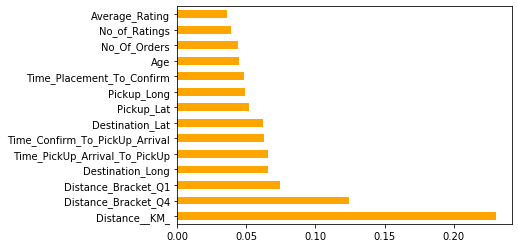

In [1060]:
# Feature importance after removing unpredictive features

feat_importances = pd.Series(RF.feature_importances_, index=x_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.plot(kind='barh', color='orange')

### Cross Validation

In [ ]:
random_s = []
rmse = []

for i in range(100):
    x_train_v, x_test_v, y_train_v, y_test_v = train_test_split(x_train,y_train,test_size=0.2,random_state=i)
    
    RF = RandomForestRegressor(n_estimators=1800, max_features='sqrt', min_samples_leaf=2, max_depth=60, min_samples_split=5)
    RF.fit(x_train_v,y_train_v)
    
    y_pred = RF.predict(x_test_v)
    rmse.append(np.sqrt(mean_squared_error(y_test_v,y_pred)))
    random_s.append(i)

# <font color=green>9. Predict and Save on Test Data</font>

In [1073]:
sendy_pred = (rf_random.predict(m_df_test))
df_sendy_pred = pd.DataFrame(sendy_pred, columns=['Time from Pickup to Arrival'], index=m_df_test.index)
df_sendy_pred.apply(lambda x: round(x, 1)).reset_index().to_csv('LondananiKhomolaSubmission.csv', index=False)

In [1069]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 53.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [1070]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [1072]:
    # Get predictions
    

y_pred = rf_random.predict(x_test)
y_test_pred = rf_random.predict(x_train)

RMSE_train = np.sqrt(mean_squared_error(y_train,y_test_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred))
R_train = round(rf_random.score(x_train, y_train),2)
R_test = round(rf_random.score(x_test, y_test),2)

print("RMSE_train:",RMSE_train,"\nRMSE_test:",RMSE_test,"\nTrain R^2:",R_train,"\nTest  R^2:",R_test)

RMSE_train: 429.5581867176536 
RMSE_test: 717.3343540614228 
Train R^2: 0.81 
Test  R^2: 0.45
